# Import Librarys

In [38]:
import bm3d
from skimage import io,img_as_float
from skimage.transform import rescale, resize
from skimage.restoration import denoise_bilateral,denoise_nl_means,  denoise_tv_chambolle,estimate_sigma
from skimage.filters import gaussian, median
import matplotlib.pyplot as plt
from skimage.morphology import disk
import cv2
import numpy as np

# Input Images

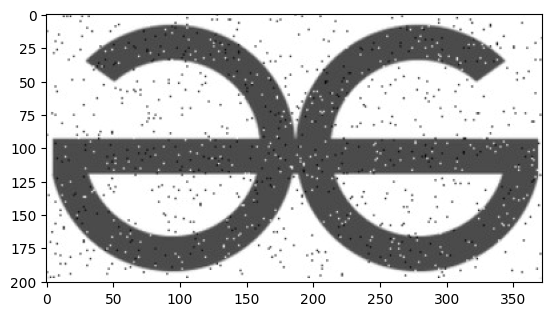

In [25]:
salty_img_f=img_as_float(io.imread('images/salty_e4.jpg',as_gray=True))
salty_img=cv2.imread('images/salty_e4.jpg',0)
plt.imshow(salty_img,cmap="gray")

# Denoising Filters

In [13]:
denoised_median=median(salty_img, disk(4),mode='constant',cval=0.0)

In [29]:
denoised_median_cv2=cv2.medianBlur(salty_img,5)

In [ ]:
denoised_bilateral=denoise_bilateral(salty_img,
                                     sigma_color=0.8, 
                                     sigma_spatial=10,
                                     mode='constant',
                                     cval=0,
                                     channel_axis=None)

In [35]:
denoised_bilateral_cv2=cv2.bilateralFilter(salty_img, 5, 15, 25,borderType=cv2.BORDER_CONSTANT)

In [39]:
est_sig=np.mean(estimate_sigma(salty_img_f, channel_axis=None))

In [63]:
denoised_nlm=denoise_nl_means(salty_img_f,
    patch_size=3,
    patch_distance=5,
    h=25*est_sig,
    fast_mode=True,
    sigma=0.0,
    channel_axis=None,)

In [77]:
denoised_tv=denoise_tv_chambolle(salty_img_f,
    weight=.4,
    eps=0.0002,
    max_num_iter=100,
    channel_axis=None)

In [54]:
denoised_bm3d=bm3d.bm3d(salty_img,sigma_psd=0.52,stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

# Outputs

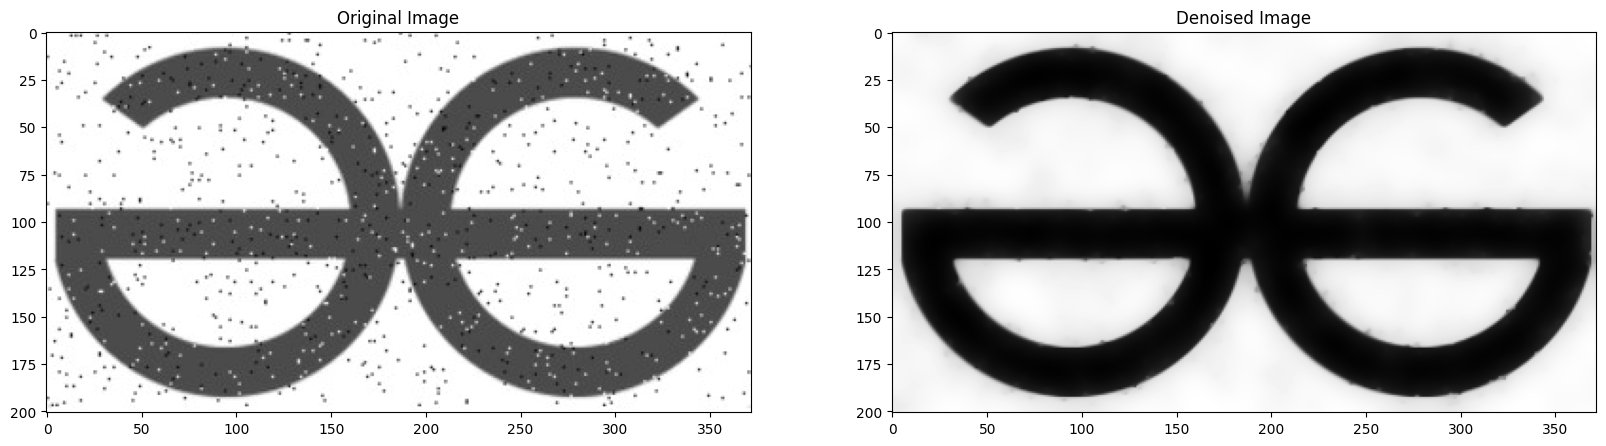

In [78]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(salty_img,cmap='gray')

plt.subplot(122)
plt.title('Denoised Image')
plt.imshow(denoised_tv,cmap='gray')